In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING ORDERS DATASET

In [20]:
df=pd.read_excel(r'C:\Users\pranj\OneDrive\Documents\farm2you order_info_dataset.xlsx')

In [21]:
df.to_csv('orders.csv', index=False)
df = pd.read_csv('orders.csv')
df

,Product category,rating,actual delivery time,estimated delivery time,delivery delay,purchase amt.,Shelf life,shipping costs
0,Legumes,4,7,2,5,320,2,60
1,Vegetables,2,0,2,0,325,6,30
2,Fruits,5,6,5,1,106,5,24
3,Nuts,4,5,6,0,305,51,52
4,Leafy Greens,5,2,8,0,199,3,53
...,...,...,...,...,...,...,...,...
977,Fruits,5,0,3,0,145,2,54
978,Leafy Greens,5,8,8,0,334,2,52
979,Legumes,5,0,6,0,285,5,42
980,Leafy Greens,3,1,2,0,439,4,57


VISUALIZING PROPORTIONS OF REVIEW RATINGS

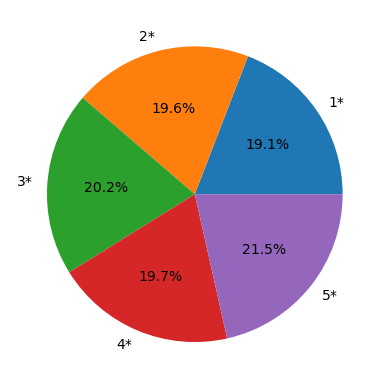

In [25]:
reviews=np.array(df["rating"])
Labels=["1*", "2*","3*","4*","5*"]
review_list=reviews.tolist()
one_star=review_list.count(1)
two_star=review_list.count(2)
three_star=review_list.count(3)
four_star=review_list.count(4)
five_star=review_list.count(5)
pie_chart=[one_star,two_star,three_star,four_star,five_star]
plt.pie(pie_chart, labels=Labels,autopct="%1.1f%%", startangle=360)
plt.show()

DISPLAYING STATISTICAL AVERAGE OF THE ATTRIBUTES

In [29]:
stats = df.iloc[:, :].describe().T
stats

,count,mean,std,min,25%,50%,75%,max
rating,982.0,3.047862,1.420238,1.0,2.0,3.0,4.0,5.0
actual delivery time,982.0,4.439919,2.887273,0.0,2.0,4.0,7.0,9.0
estimated delivery time,982.0,4.411405,2.865982,0.0,2.0,4.0,7.0,9.0
delivery delay,982.0,1.736253,2.473651,0.0,0.0,0.0,3.0,9.0
purchase amt.,982.0,300.242363,117.005930,101.0,199.0,304.0,402.0,500.0
Shelf life,982.0,14.068228,26.710713,1.0,3.0,4.0,6.0,120.0
shipping costs,982.0,40.392057,17.757400,10.0,26.0,40.0,56.0,70.0


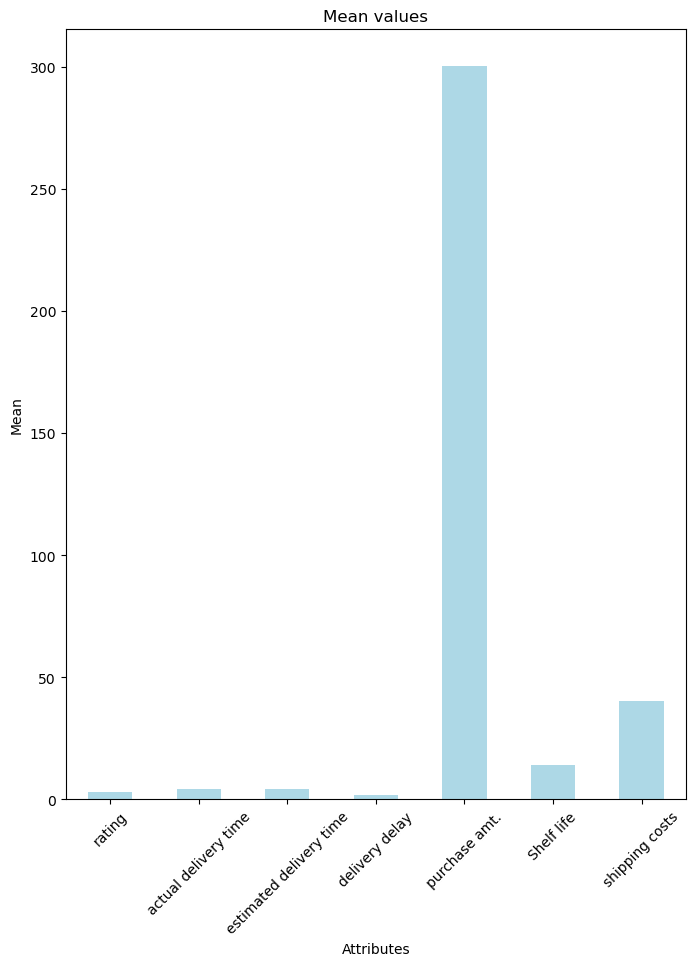

In [31]:
plt.figure(figsize=(8,10))
stats['mean'].plot(kind='', color='lightblue')
plt.title('Mean values')
plt.xlabel('Attributes')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()

VISUALIZATION OF TOTAL REVENUE GENERATED FROM EACH PRODUCT CATEGORY

In [35]:
revenue_per_category= df.groupby(['Product category']).sum().reset_index()

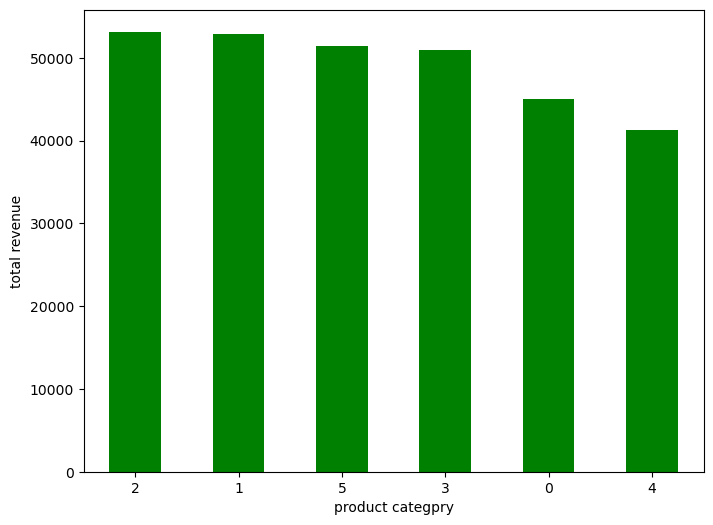

In [41]:
plt.figure(figsize=(8,6))
revenue_per_category.sort_values(by='purchase amt.', ascending=False)['purchase amt.'].plot(kind='bar', color= 'green')
plt.xlabel('product categpry')
plt.ylabel('total revenue')
plt.xticks(rotation = 360)
plt.show()

FINDING INSIGHTS ABOUT THE RANGE OF SHELF LIFE OF PRODUCTS THAT YIELDS THE MOST REVENUE

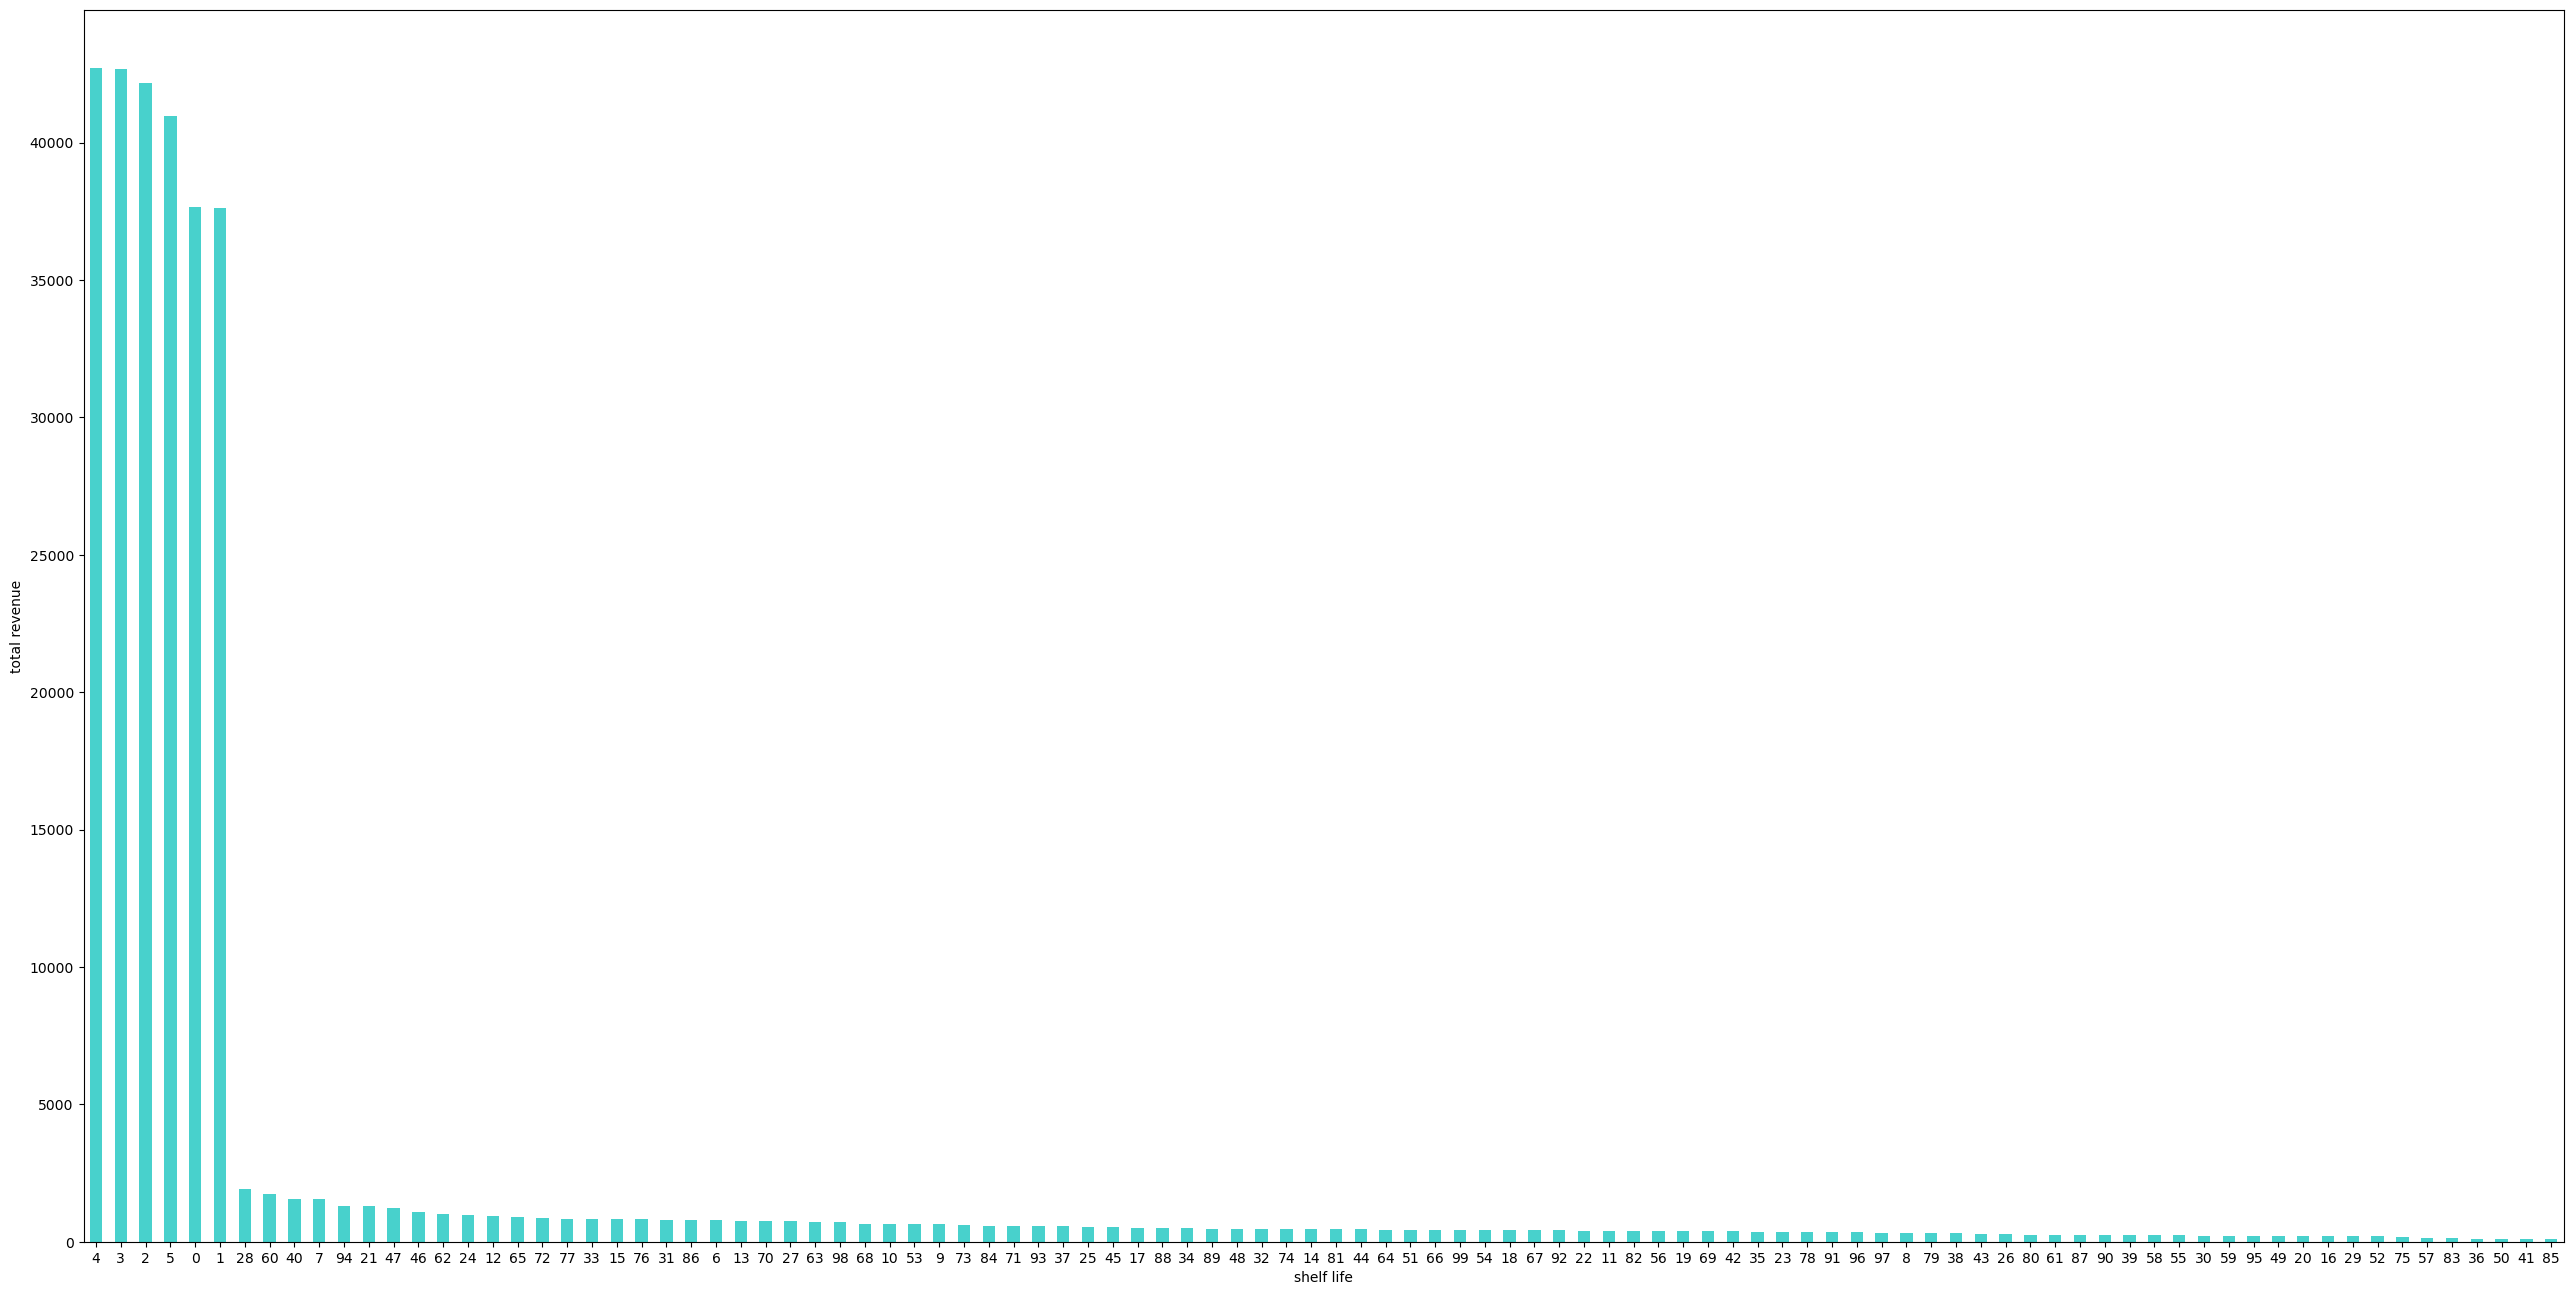

In [51]:
revenue_per_shelf_life= df.groupby(['Shelf life']).sum().reset_index()
plt.figure(figsize=(32,16))
revenue_per_shelf_life.sort_values(by='purchase amt.', ascending=False)['purchase amt.'].plot(kind='bar', color= 'mediumturquoise')
plt.xlabel('shelf life')
plt.ylabel('total revenue')
plt.xticks(rotation = 360)
plt.show()

DETERMINING THE PROPORTIONS OF DEMAND FOR EACH PRODUCT CATEGORY

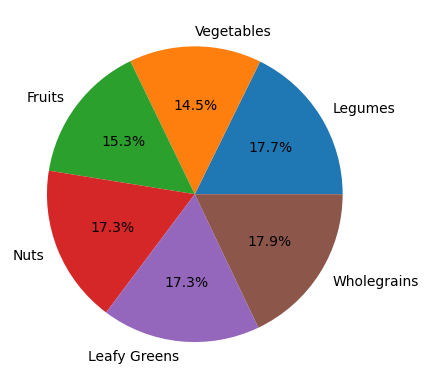

In [52]:
demand_per_category=np.array(df["Product category"])
Labels=["Legumes", "Vegetables","Fruits","Nuts","Leafy Greens","Wholegrains"]
demand_list=demand_per_category.tolist()
Legumes=demand_list.count("Legumes")
Vegetables=demand_list.count("Vegetables")
Fruits=demand_list.count("Fruits")
Nuts=demand_list.count("Nuts")
Leafy_Greens=demand_list.count("Leafy Greens")
Wholegrains=demand_list.count("Wholegrains")
pie_chart=[Legumes,Vegetables,Fruits,Nuts,Leafy_Greens,Wholegrains]
plt.pie(pie_chart, labels=Labels,autopct="%1.1f%%", startangle=360)
plt.show()

IMPORTING SURVEY DATA

In [68]:
survey_df=pd.read_excel(r'C:\Users\pranj\OneDrive\Documents\farm2you survey_data.xlsx')
survey_df.to_csv('survey.csv', index=False)
survey_df = pd.read_csv('survey.csv')
survey_df

,customer no.,age,location,gender,most preferred category,satisfaction score
0,1,45,Maharashtra,F,Legumes,1
1,2,35,Karnataka,M,Wholegrains,3
2,3,46,Telangana,M,Fruits,5
3,4,32,Andhra Pradesh,M,Vegetables,4
4,5,42,Tamil Nadu,F,Leafy Greens,2
...,...,...,...,...,...,...
581,582,37,Andhra Pradesh,M,Nuts,4
582,583,49,Telangana,M,Legumes,2
583,584,36,Tamil Nadu,M,Fruits,2
584,585,33,Maharashtra,F,Wholegrains,2


DISPLAYING OVERALL CUSTOMER SATISFACTION SCORES

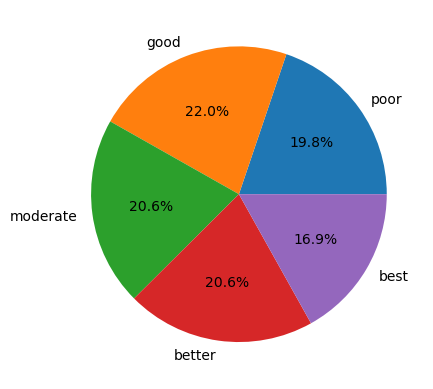

In [69]:
sat_score=np.array(survey_df["satisfaction score"])
labels=["poor", "good","moderate","better","best"]
score_list=sat_score.tolist()
poor=score_list.count(1)
good=score_list.count(2)
moderate=score_list.count(3)
better=score_list.count(4)
best=score_list.count(5)
cust_sat_pie_chart=[poor, good,moderate,better,best]
plt.pie(cust_sat_pie_chart, labels=labels,autopct="%1.1f%%", startangle=360)
plt.show()

VISUALIZING SATISFACTION SCORE FOR EACH GENDER CATEGORY

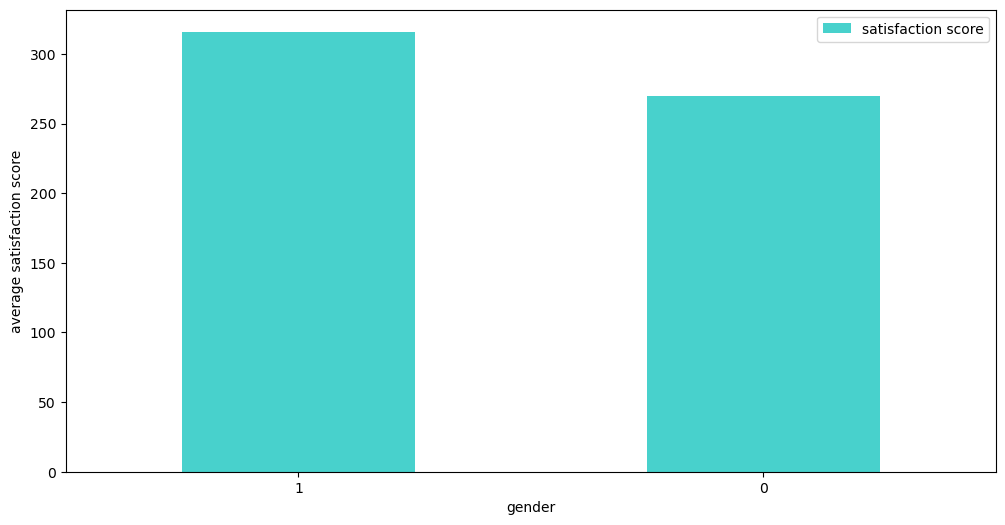

In [83]:
score_by_gender= survey_df.groupby(['gender']).count().reset_index()
plt.figure(figsize=(12,6))
score_by_gender.sort_values(by='satisfaction score', ascending=False)['satisfaction score'].plot(kind='bar', color= 'mediumturquoise')
plt.xlabel('gender')
plt.ylabel('average satisfaction score')
plt.xticks(rotation = 360)
plt.legend()
plt.show()

VISUALIZING SATISFACTION SCORE OF DISTINCT LOCATIONS

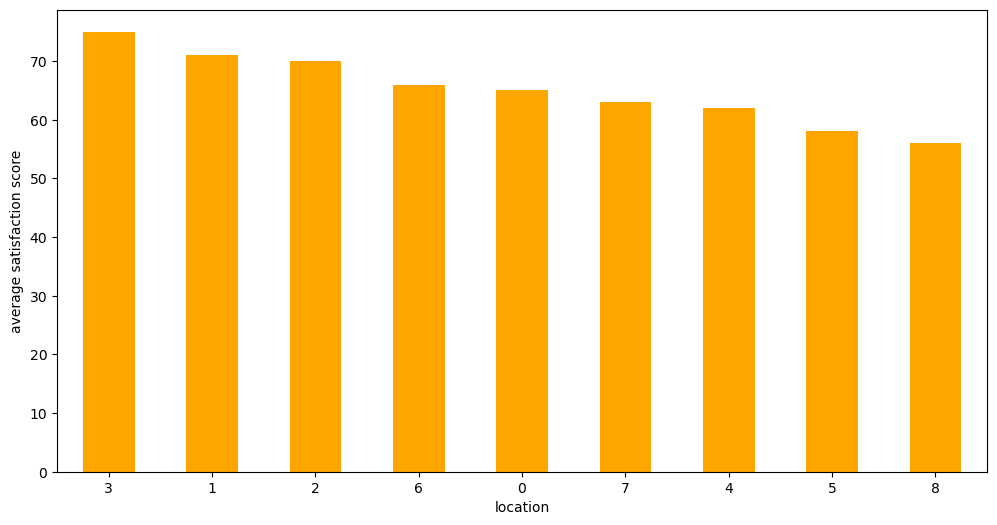

In [82]:
score_by_gender= survey_df.groupby(['location']).count().reset_index()
plt.figure(figsize=(12,6))
score_by_gender.sort_values(by='satisfaction score', ascending=False)['satisfaction score'].plot(kind='bar', color= 'orange')
plt.xlabel('location')
plt.ylabel('average satisfaction score')
plt.xticks(rotation = 360)
plt.show()

VISUALIZING SATISFACTION SCORE FOR EACH PRODUCT CATEGORY

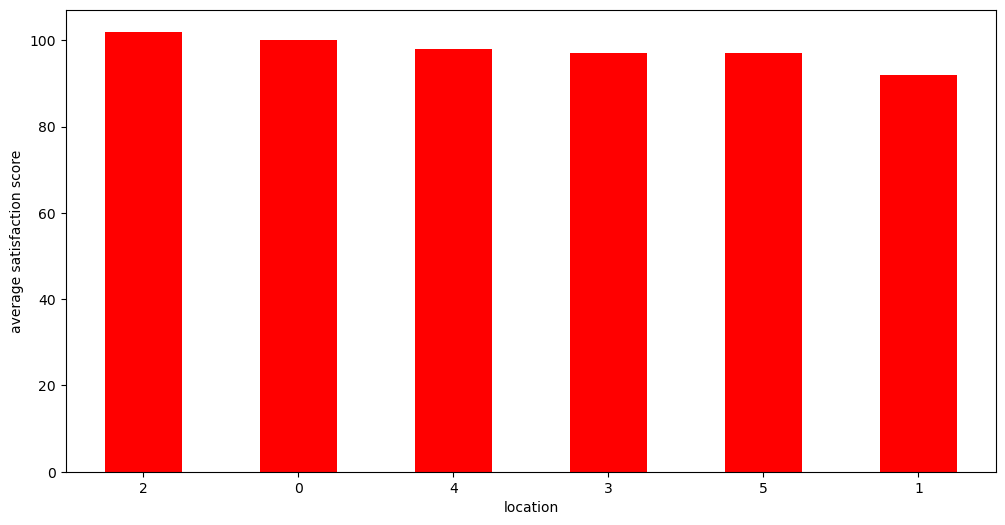

In [85]:
score_by_gender= survey_df.groupby(['most preferred category']).count().reset_index()
plt.figure(figsize=(12,6))
score_by_gender.sort_values(by='satisfaction score', ascending=False)['satisfaction score'].plot(kind='bar', color= 'red')
plt.xlabel('location')
plt.ylabel('average satisfaction score')
plt.xticks(rotation = 360)
plt.show()